<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/ZFnet_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install pydot

In [11]:
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,Flatten,Conv2D,Dense,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from keras.utils import plot_model
from IPython.display import Image
#here we make the ZF net using the classes
class ZFnet():
  def __init__(self):
    self.input_size=(224,224,3)
    self.num_classes=10
    self.activation='relu'
    self.model=None
  def build_model(self):
    input_tensor=Input(shape=self.input_size)
    conv_1=Conv2D(96,7,strides=2,padding='same',activation=self.activation)(input_tensor)
    maxpool_1=MaxPool2D(pool_size=3,strides=2)(conv_1)
    conv_2=Conv2D(256,3,strides=2,padding='same',activation=self.activation)(maxpool_1)
    maxpool_2=MaxPool2D(3,strides=2)(conv_2)
    conv_3=Conv2D(384,3,strides=1,padding='same',activation=self.activation)(maxpool_2)
    conv_4=Conv2D(384,3,strides=1,padding='same',activation=self.activation)(conv_3)
    conv_5=Conv2D(256,3,strides=1,padding='same',activation=self.activation)(conv_4)
    maxpool_5=MaxPool2D(3,strides=2)(conv_5)
    flatten=Flatten()(maxpool_5)
    fc_1=Dense(4096,activation=self.activation)(flatten)
    fc_2=Dense(4096,activation=self.activation)(fc_1)
    fc_3=Dense(self.num_classes,activation=self.activation)(fc_2)
    model=Model(inputs=input_tensor,outputs=fc_3)

    self.model=model

  def plot_model(self):
    if self.model is None:
      print("The model is not yet built")
    else:
      plot_model(self.model,show_layer_names=True,show_shapes=True,to_file='model.png')
      display(Image(filename='model.png'))



  def model_summary(self):
    if self.model is None:
      print("The model is not yet built")
    else:
      self.model.summary()


In [35]:
#here we create the object instance of the class
zfnet1=ZFnet()
zfnet1.build_model()


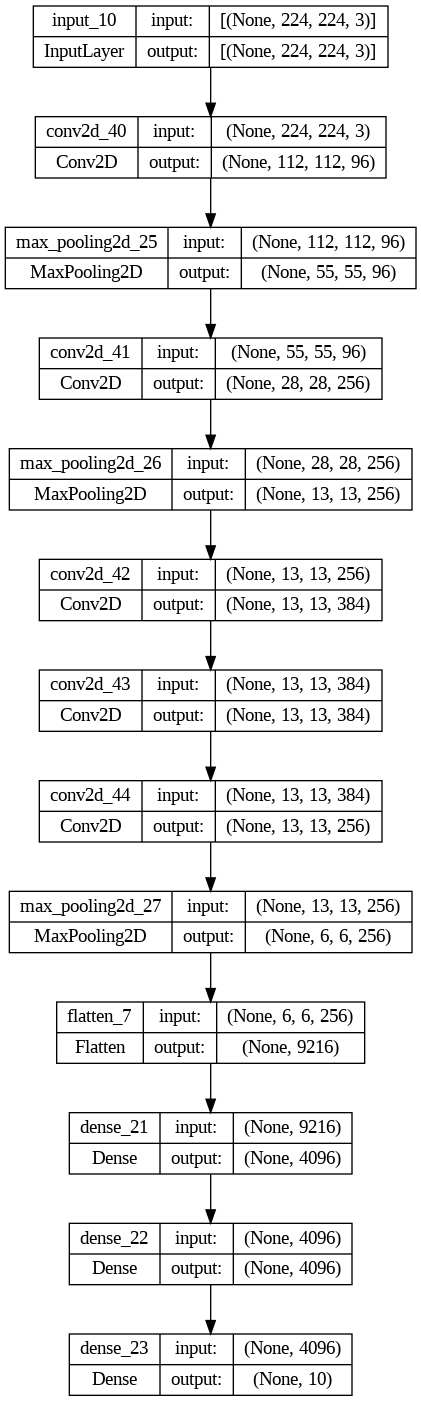

In [36]:
zfnet1.plot_model()

In [29]:
zfnet1.model_summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_25 (Conv2D)          (None, 112, 112, 96)      14208     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 55, 55, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 256)       221440    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 13, 13, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 13, 13, 384)       8851